# TITANIC SURVIVAL PREDICTION USING MACHINE LEARNING

### AUTHOR-RAKESH NASKAR
DOMAIN-DATA SCIENCE

In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Data collection & processing

In [4]:
df=pd.read_csv('C:/Users/rakes/OneDrive/Desktop/rakesh/train2.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# olumns which contains null values
[features for features in df.columns if df[features].isnull().sum()>0]

['Age', 'Cabin', 'Embarked']

<Axes: >

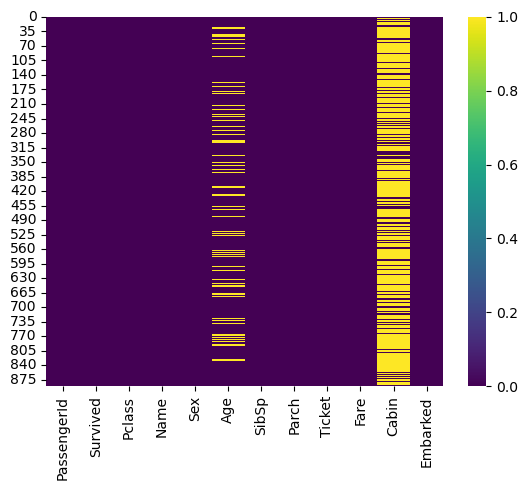

In [10]:
sns.heatmap(df.isnull(),cmap='viridis')

### Handling missing values

In [11]:
df=df.drop(columns='Cabin',axis=1)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: xlabel='Age', ylabel='Count'>

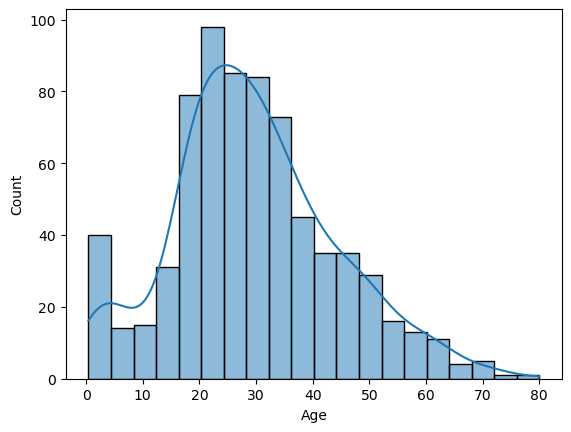

In [13]:
sns.histplot(df['Age'],kde=True)

it's more likely a normally distributed data.Mean suits well

2.median value skewed(when we have outliers in the dataset i.e. it,s rightly or left skewed)

In [14]:
# Replacing the missing values in age column with mean value
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [15]:
# finding the mode value of embarked column(we are finding the value repeated most of the time in embarked column so that we can replace the missing values with most repeated values)
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [16]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
print(df['Embarked'].mode()[0])

S


In [18]:
#replacing the missing values in embarked column with mode values
df['Embarked'].fillna(df["Embarked"].mode()[0],inplace=True)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Analysis

In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
#Finding the number of people survived and not survived
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### Data Visualization

In [23]:
numeric_df=df.select_dtypes(include=[np.number])
corr_mat=numeric_df.corr()
print(corr_mat)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.033207 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.069809 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.331339  0.083081  0.018443   
Age             0.033207 -0.069809 -0.331339  1.000000 -0.232625 -0.179191   
SibSp          -0.057527 -0.035322  0.083081 -0.232625  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.179191  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.091566  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.091566  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


<Axes: >

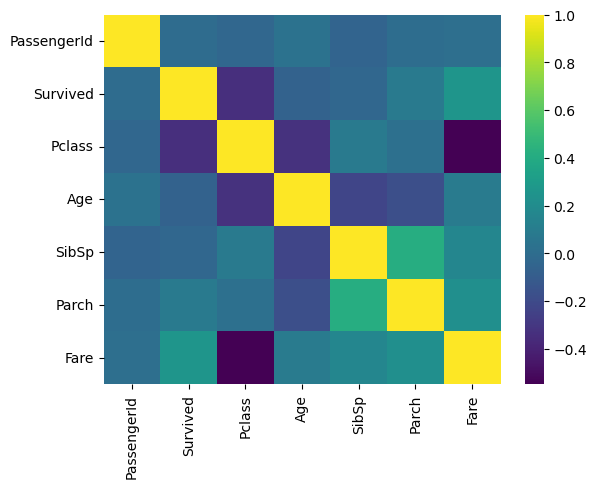

In [24]:
sns.heatmap(corr_mat,cmap='viridis')

C:\Users\rakes\AppData\Local\Temp\ipykernel_4968\96525092.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=df,palette=['skyblue','brown'])


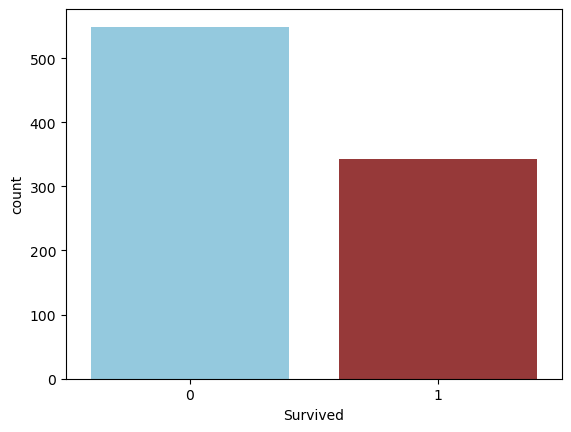

In [25]:
sns.countplot(x='Survived',data=df,palette=['skyblue','brown'])
plt.show()

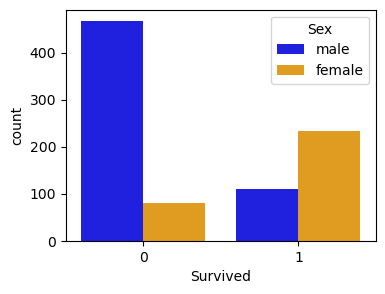

In [26]:
#no. of survivor genderwise
plt.figure(figsize=(4,3))
sns.countplot(x='Survived',data=df,palette=['blue','orange'],hue='Sex')
plt.show()

In [27]:
survival_counts=df.groupby(['Sex','Survived']).size().unstack()

In [28]:
survival_counts

Survived,0,1
Sex,,
female,81,233
male,468,109


Most survivals were female

<Axes: xlabel='Pclass', ylabel='count'>

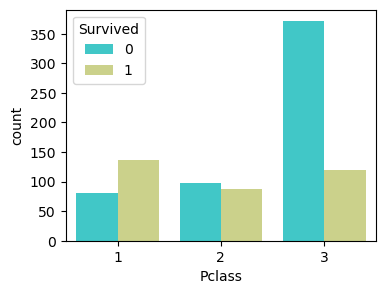

In [29]:
# No.of people survived in each slass
plt.figure(figsize=(4,3))
sns.countplot(x='Pclass',data=df,palette='rainbow',hue='Survived')

In [30]:
Pclass_survived_0_counts=df[df['Survived']==0].groupby('Pclass').size()
print(Pclass_survived_0_counts)

Pclass
1     80
2     97
3    372
dtype: int64


<Axes: xlabel='Age', ylabel='Count'>

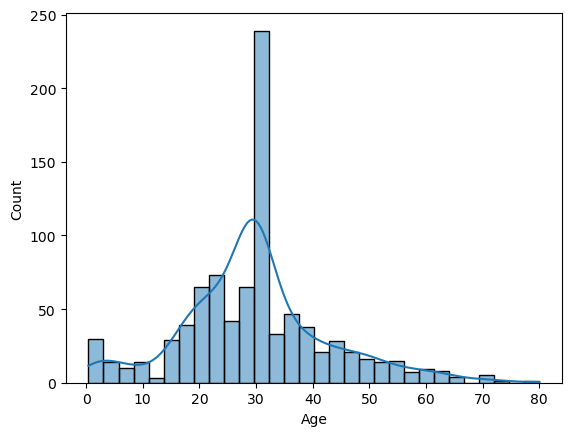

In [31]:
sns.histplot(df['Age'],kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

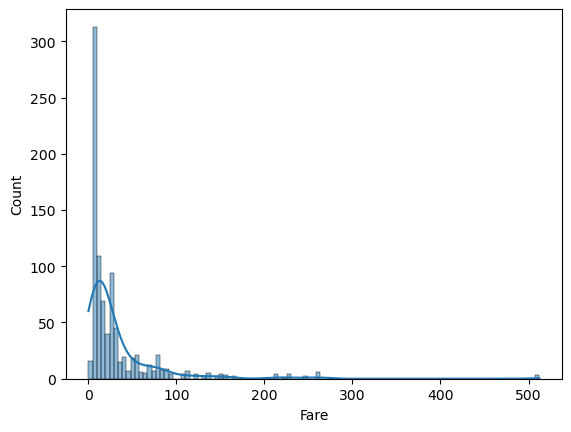

In [32]:
sns.histplot(df['Fare'],kde=True)

In [33]:
Survived_Age_0_counts=df[df['Survived']==1].groupby('Age').size().reset_index(name='count')
print(Survived_Age_0_counts)

      Age  count
0    0.42      1
1    0.67      1
2    0.75      2
3    0.83      2
4    0.92      1
..    ...    ...
61  58.00      3
62  60.00      2
63  62.00      2
64  63.00      2
65  80.00      1

[66 rows x 2 columns]


In [35]:
age_0_survived=pd.DataFrame(df)


In [36]:
age_0_survived[age_0_survived['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


In [38]:
Pclass_survived_0_counts=df.groupby('Survived')['Pclass'].size()
print(Pclass_survived_0_counts)

Survived
0    549
1    342
Name: Pclass, dtype: int64


In [39]:
Pclass_survived_0_counts=df.groupby('Survived').size()
print(Pclass_survived_0_counts)

Survived
0    549
1    342
dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

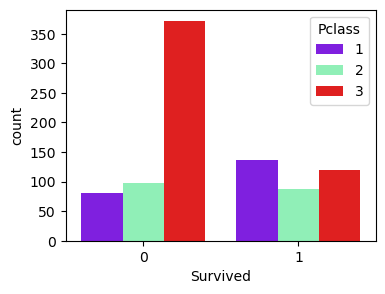

In [40]:
plt.figure(figsize=(4,3))
sns.countplot(x='Survived',data=df,hue='Pclass',palette='rainbow')

In [41]:
df.groupby(['Pclass','Survived']).size().unstack()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Survived', ylabel='Age'>

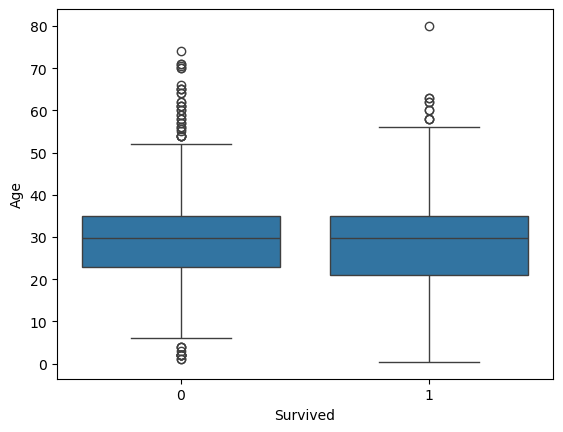

In [42]:
# age distribution
sns.boxplot(x='Survived',y='Age',data=df)

<Axes: >

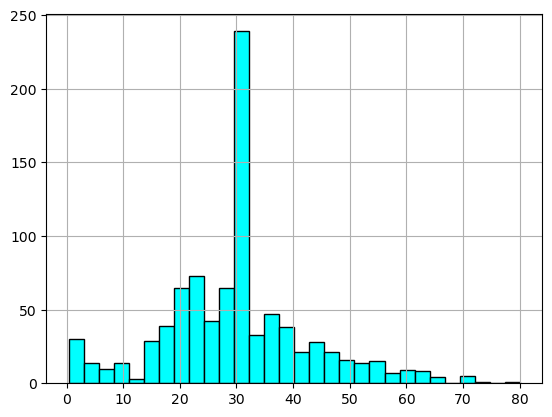

In [43]:
#Age distribution
df['Age'].hist(bins=30,color='cyan',ec='black')

<Axes: xlabel='Age', ylabel='Density'>

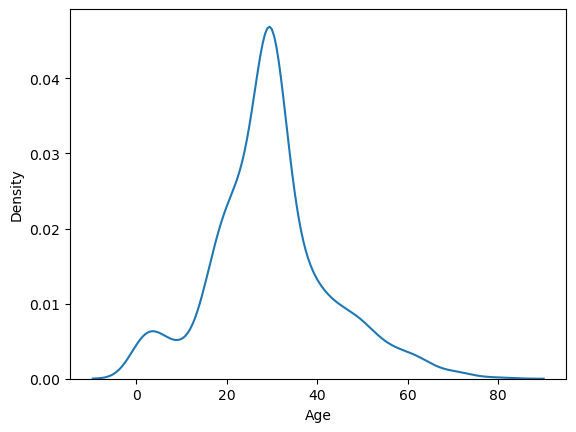

In [44]:
sns.kdeplot(x=df['Age'])

Age column follows normal distribution

<Axes: xlabel='SibSp', ylabel='Survived'>

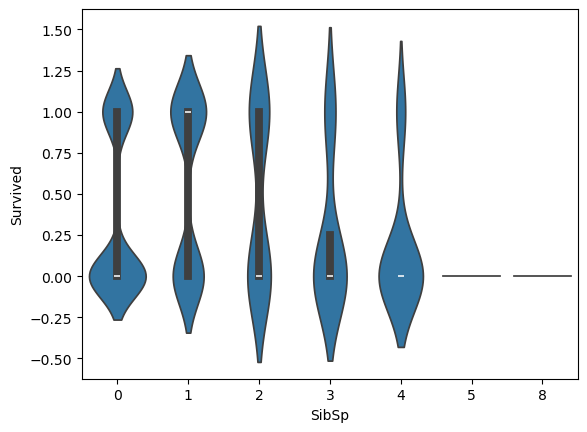

In [45]:
sns.violinplot(x='SibSp',y='Survived',data=df)

C:\Users\rakes\AppData\Local\Temp\ipykernel_4968\1330837736.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp',data=df,palette='rainbow')


<Axes: xlabel='SibSp', ylabel='count'>

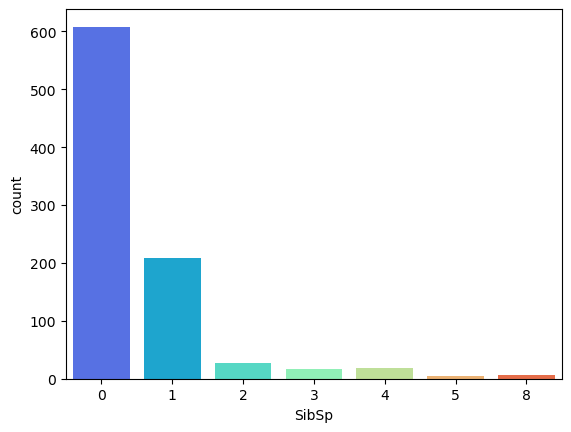

In [46]:
sns.countplot(x='SibSp',data=df,palette='rainbow')

<Axes: xlabel='SibSp', ylabel='count'>

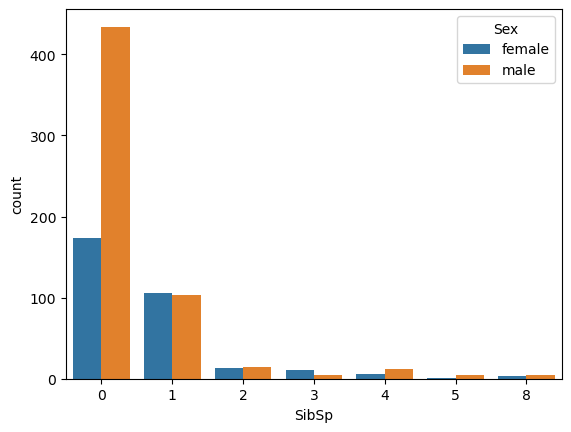

In [47]:
sns.countplot(x=df['SibSp'],hue=df['Sex'])

<Axes: xlabel='Embarked', ylabel='count'>

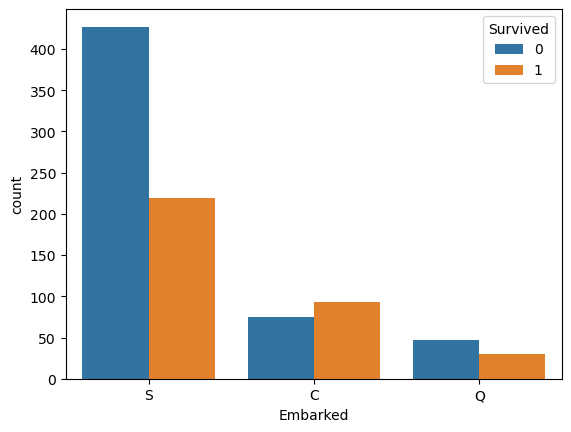

In [48]:
## Survival of Embarked
sns.countplot(x=df['Embarked'],hue=df['Survived'])

C:\Users\rakes\AppData\Local\Temp\ipykernel_4968\1917891470.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Embarked',y='Survived',data=df,ci=None,hue='Sex')


<Axes: xlabel='Embarked', ylabel='Survived'>

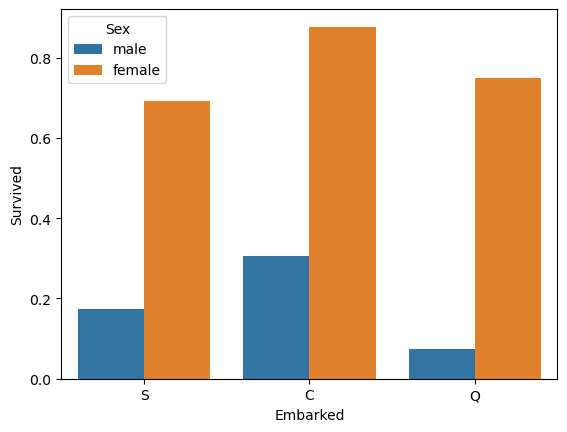

In [49]:
sns.barplot(x='Embarked',y='Survived',data=df,ci=None,hue='Sex')

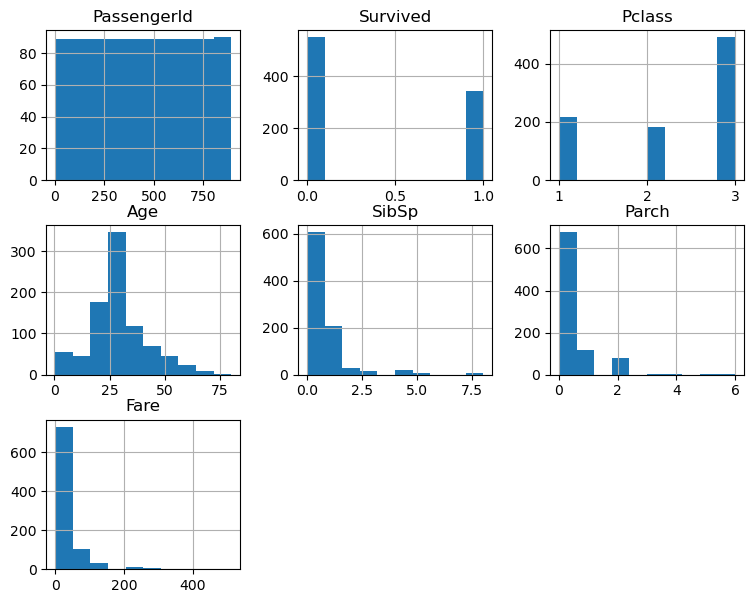

In [50]:
df.hist(figsize=(9,7))
plt.show()

C:\Users\rakes\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 5000x5000 with 0 Axes>

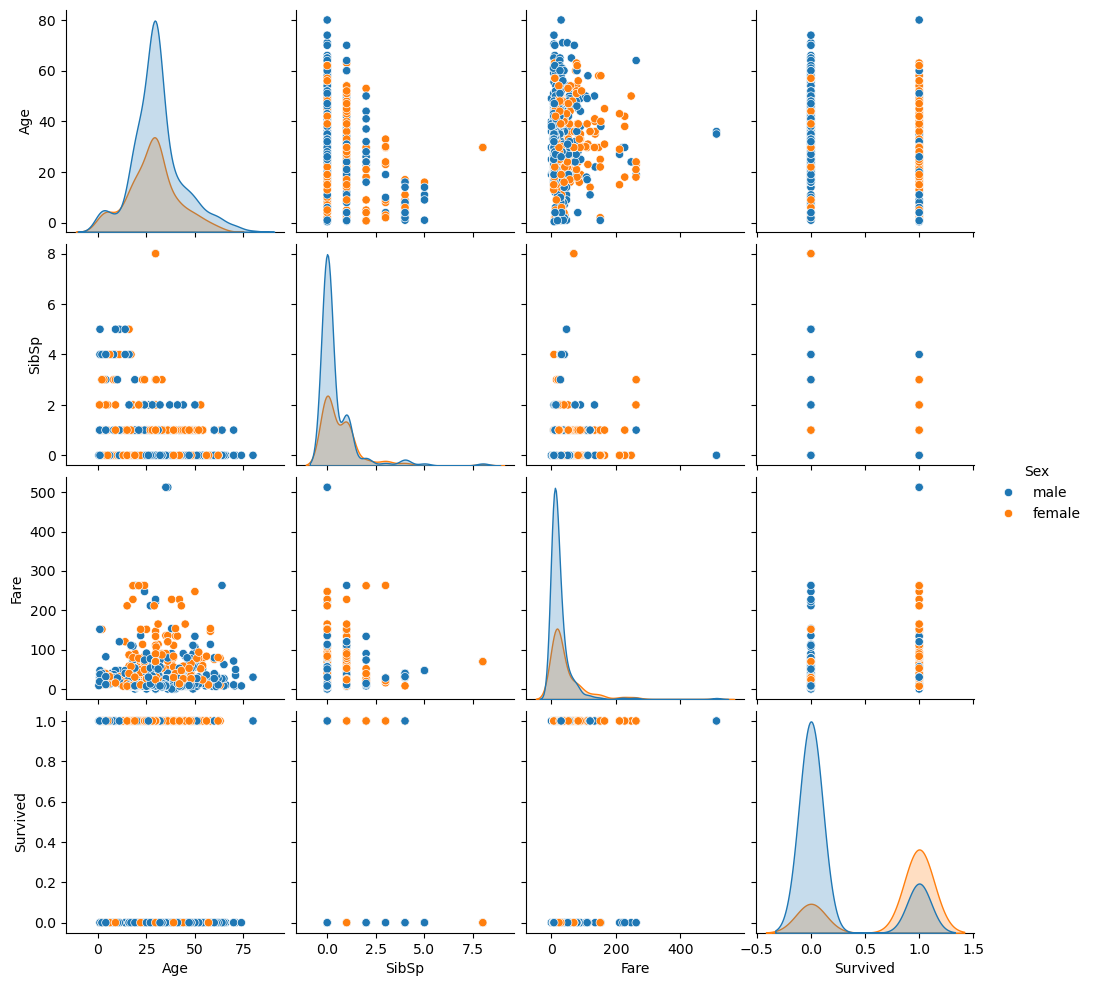

In [51]:
plt.figure(figsize=(50,50))
sns.pairplot(df,vars=['Age','SibSp','Fare','Survived'],hue='Sex',kind='scatter')
plt.show()

### Encoding the categorical columns


In [52]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [53]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [54]:
#Converting categorical columns
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


### Separating features & target

In [56]:
x=df.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=df['Survived']

In [57]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


 print(y)

In [68]:
 print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


### Spliting the data into training data and test data

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [59]:
print(x.shape,x_train.shape,x_test.shape)

(891, 7) (712, 7) (179, 7)


## Model Training

In [60]:
model=LogisticRegression()

In [61]:
# Training the logistics regression moedl with training data
model.fit(x_train,y_train)

C:\Users\rakes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Model Evaluation

Accuracy Score

In [62]:
x_train_prdiction=model.predict(x_train)

In [63]:
print(x_train_prdiction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [65]:
training_data_accuracy=accuracy_score(y_train,x_train_prdiction)
print(f' Accuracy score of training data is {training_data_accuracy}')

 Accuracy score of training data is 0.8075842696629213


In [66]:
x_test_prdiction=model.predict(x_test)

In [67]:
test_data_accuracy=accuracy_score(y_test,x_test_prdiction)
print('Accuracy score of training data is:',test_data_accuracy)

Accuracy score of training data is: 0.7821229050279329
